## Task 1: Prediction using Supervised ML

<h4>Arthur: Ujjwal Dhiman</h4> 

## **Linear Regression with Python Scikit Learn**
<p>One example of a Data  Model that we will be using is:</p>
<b>Simple Linear Regression</b>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



<h1>Importing Libraries</h1>

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

<h1 id="data_acquisition">Data Acquisition</h1>
<p>
Data Acquisition is a process of loading and reading data into notebook from various sources.
    
There are various formats for a dataset: .csv, .json, .xlsx  etc. The dataset can be stored in different places, on your local machine or sometimes online.<br>

In our case, the student's scores data is in a CSV (comma separated value) format.
    
The Pandas Library is a useful tool that enables us to read various datasets into a dataframe.
</p>

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h1 id="basic_insight">Basic Insight of Dataset</h1>
<p>
After reading data into Pandas dataframe, it is time for us to explore the dataset.<br>

There are several ways to obtain essential insights of the data to help us better understand our dataset.

</p>


<h2>Shape of Dataset</h2>

In [3]:
print("Shape of dataset:-")
print("No of rows is {}.".format(df.shape[0]))
print("No of columns is {}.".format(df.shape[1]))

Shape of dataset:-
No of rows is 25.
No of columns is 2.


<h2>Data Types</h2>
<p>
Data has a variety of types.<br>

The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:

</p>


In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

<h2>Describe</h2>
<p>If we would like to get a statistical summary of each column e.g. count, column mean value, column standard deviation, etc., we use the describe method:</p>


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<h2>Visualizing Dataset</h2>

Text(0.5, 1.0, 'Hour vs Scores')

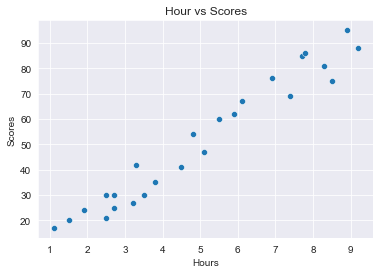

In [7]:
sns.set_style("darkgrid")
sns.scatterplot(x = df.Hours, y = df.Scores)
plt.title("Hour vs Scores")

<h2>Preparing Data and Spliting into Train/Test set</h2>

In [8]:
X = df[['Hours']]
y = df['Scores']
type(X)

pandas.core.frame.DataFrame

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [10]:
print("Size of X_train is {}".format(X_train.size))
print("Size of y_train is {}".format(y_train.size))
print("Size of X_test is {}".format(X_test.size))
print("Size of y_test is {}".format(y_test.size))

Size of X_train is 20
Size of y_train is 20
Size of X_test is 5
Size of y_test is 5


<h2>Training the Algorithm on Training Data</h2>

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
lr.coef_

array([9.91065648])

In [14]:
lr.intercept_

2.018160041434683

In [15]:
reg_line = lr.coef_ * X + lr.intercept_

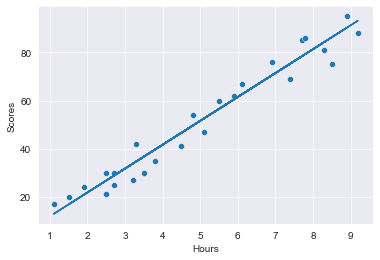

In [16]:
sns.scatterplot(x = df['Hours'], y = y)
plt.plot(df['Hours'], reg_line)

As we saw above, we should get a final linear model with the structure:


$$
Yhat = a + b  X
$$


Plugging in the actual values we get:


<b>Score</b> =  9.91065648 x <b>Hours</b> + 2.018160041434683

<h2>Making Predictions</h2>

In [17]:
y_pred = lr.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
y_test

5     20
2     27
19    69
16    30
11    62
Name: Scores, dtype: int64

In [19]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


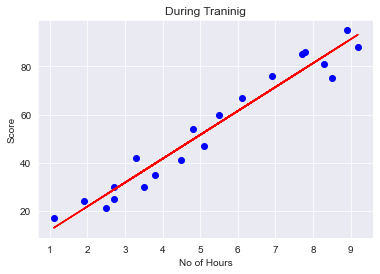

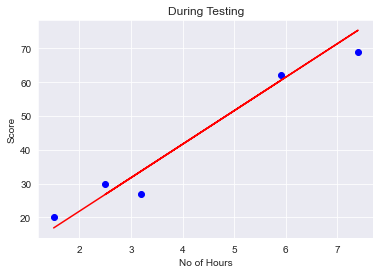

In [20]:
plt.scatter(X_train,y_train,color = 'blue')
plt.plot(X_train,lr.predict(X_train),color = 'red')
plt.xlabel("No of Hours")
plt.ylabel("Score")
plt.title("During Traninig")
plt.show()

plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,y_pred,color = 'red')
plt.xlabel("No of Hours")
plt.ylabel("Score")
plt.title("During Testing")
plt.show()

<h2>Evaluating the model</h2>
<p>Now that we've developed the model, it's time to evaluate our model.</p>

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
print("Mean Squared Error on Test Data. ", mean_squared_error(y_test, y_pred))

Mean Squared Error on Test Data.  21.5987693072174


In [23]:
print("R2 Score on Test Data: ", lr.score(X_test,y_test))

R2 Score on Test Data:  0.9454906892105356


## Thank You